In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
data.drop(['Unnamed: 0','newspaper'],axis=1,inplace=True)
data.head()

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [9]:
data.columns

Index(['TV', 'radio', 'sales'], dtype='object')

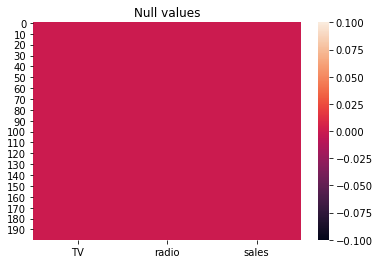

In [10]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [11]:
import warnings
warnings.filterwarnings('ignore')

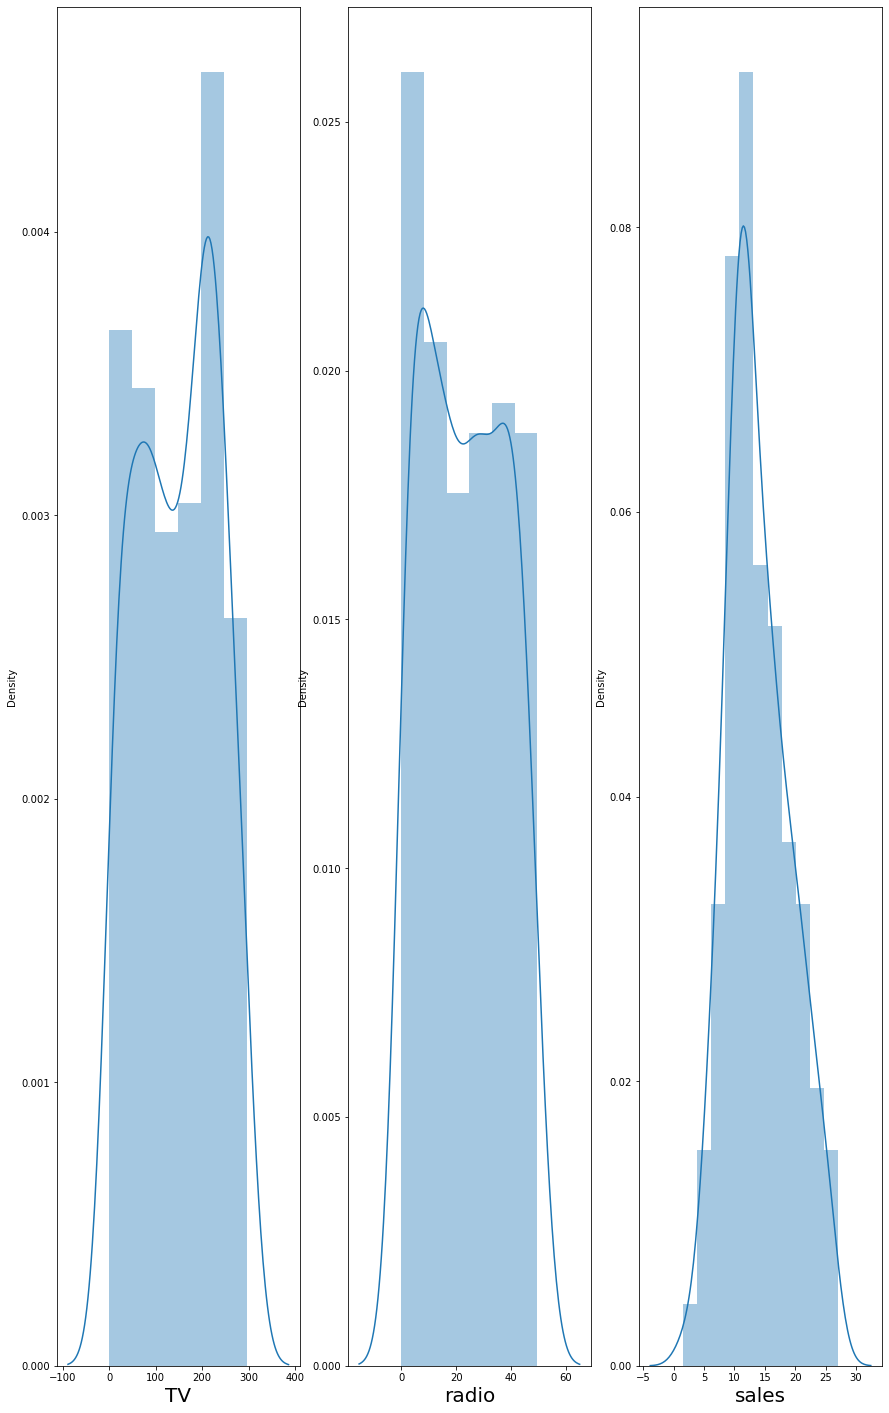

In [12]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=3:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

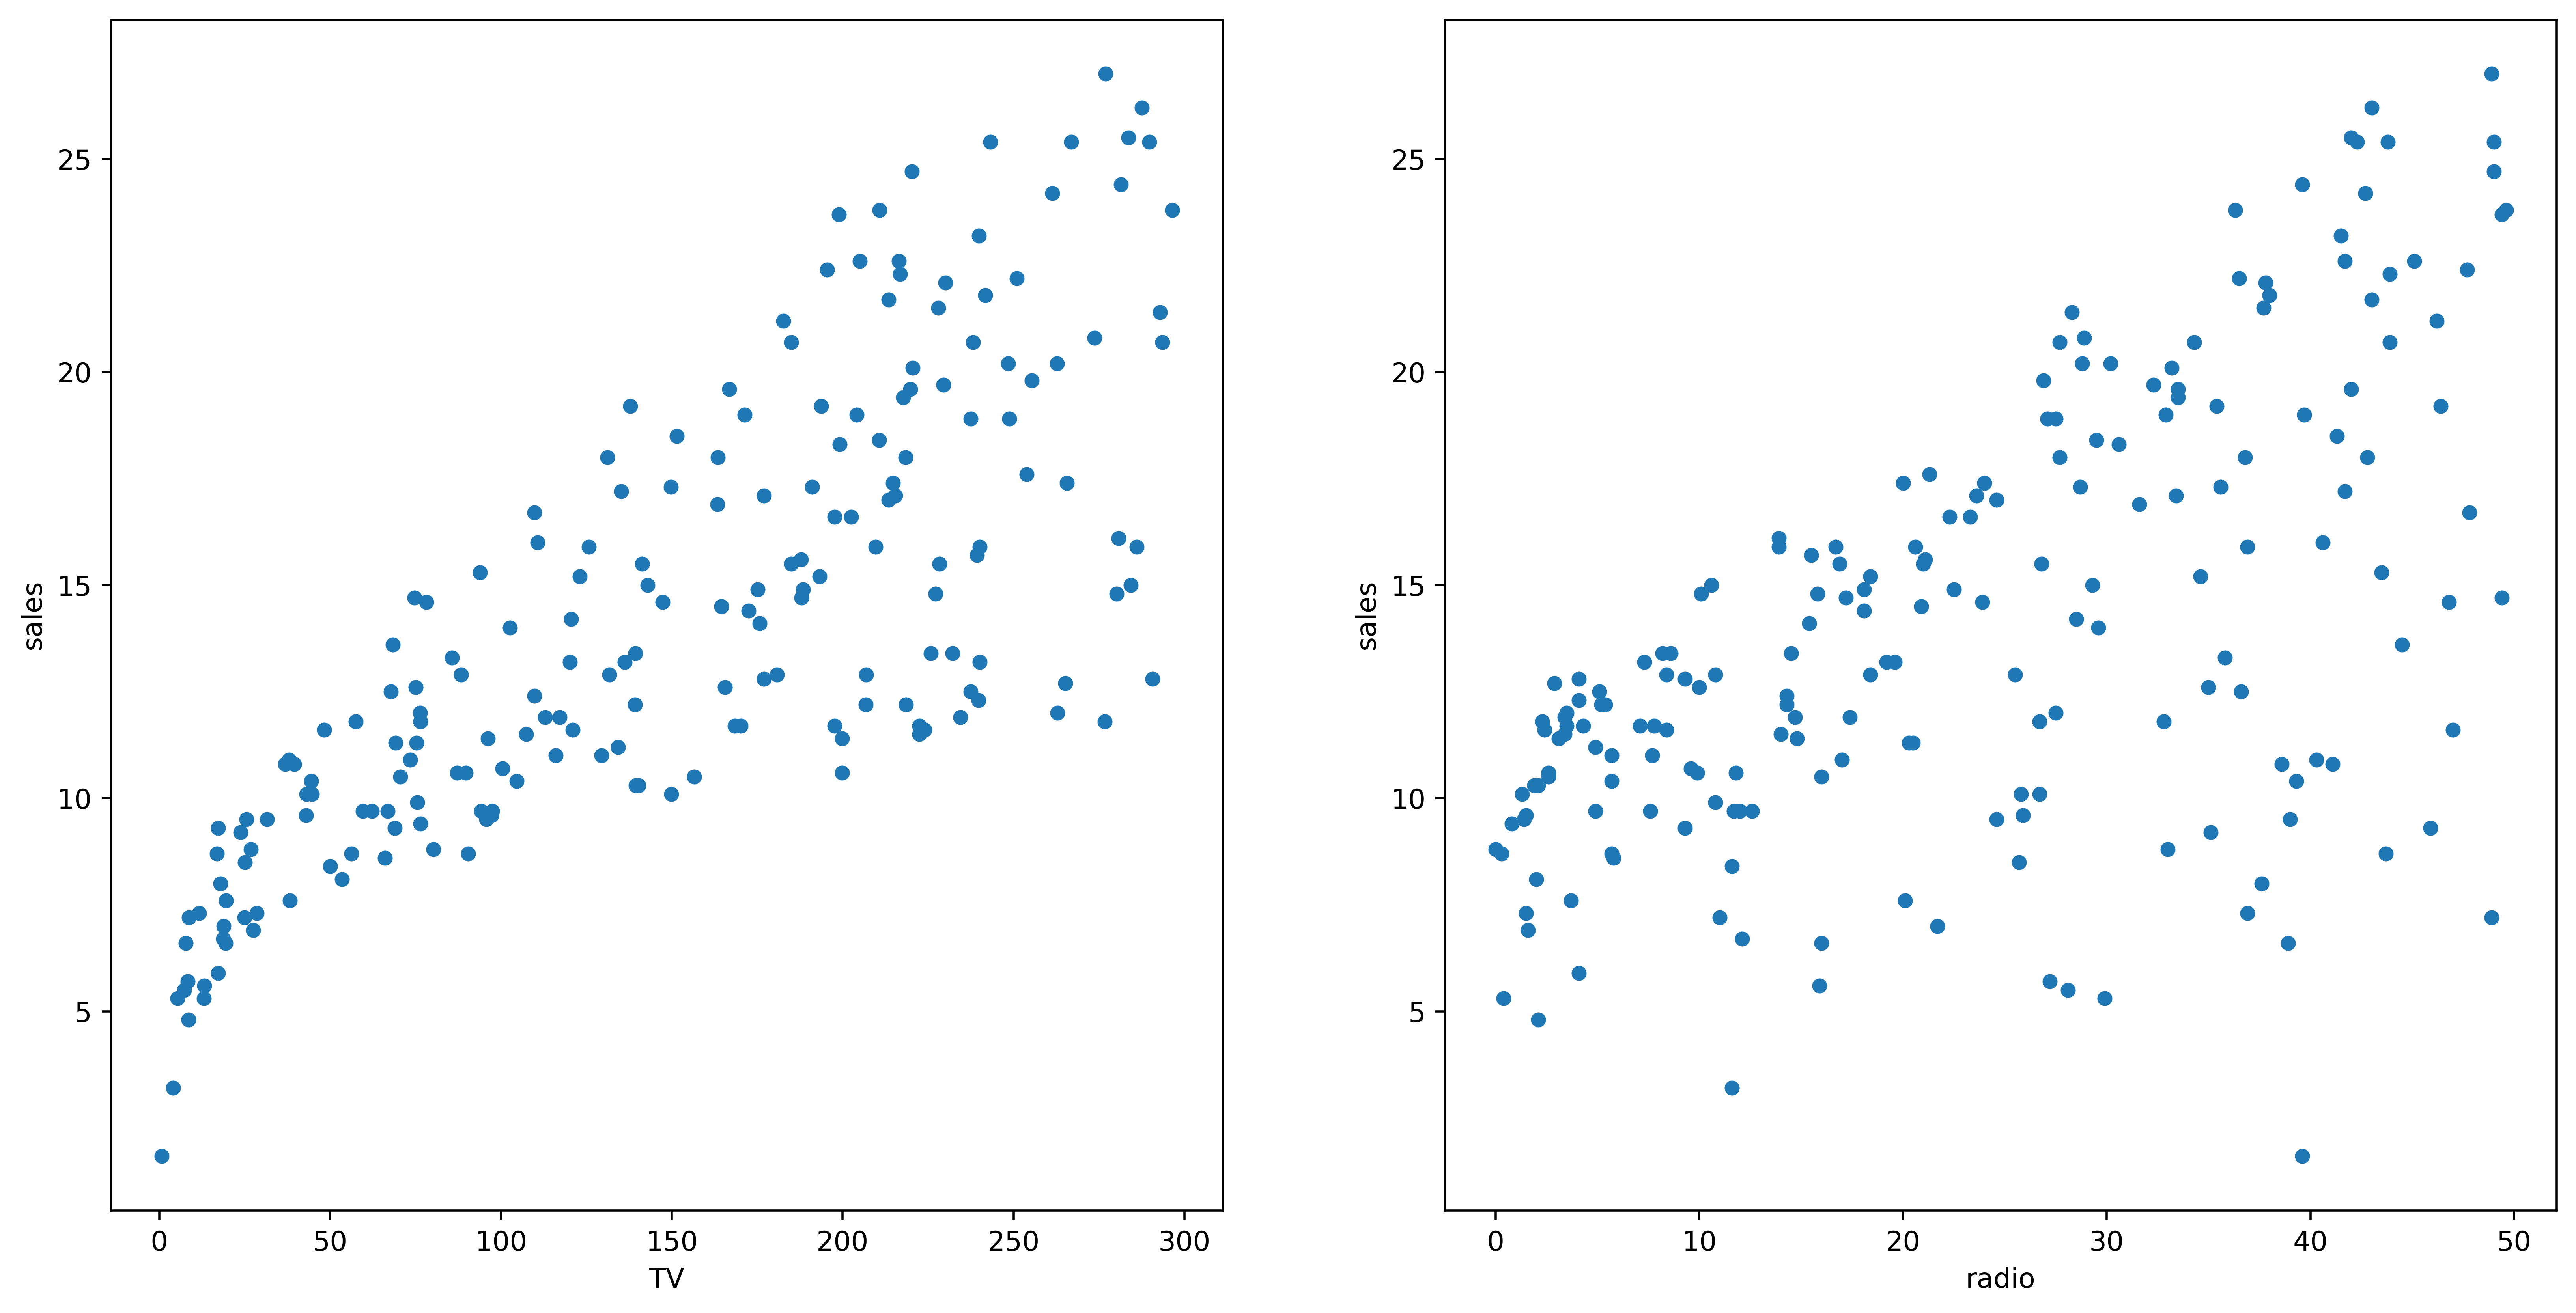

In [13]:
fig,axs=plt.subplots(1,2,figsize=(16,8),dpi=500)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1],figsize=(16,8))
fig.savefig('testdata23.jpg')

In [14]:
data.corr()

,TV,radio,sales
TV,1.000000,0.054809,0.782224
radio,0.054809,1.000000,0.576223
sales,0.782224,0.576223,1.000000


<AxesSubplot:>

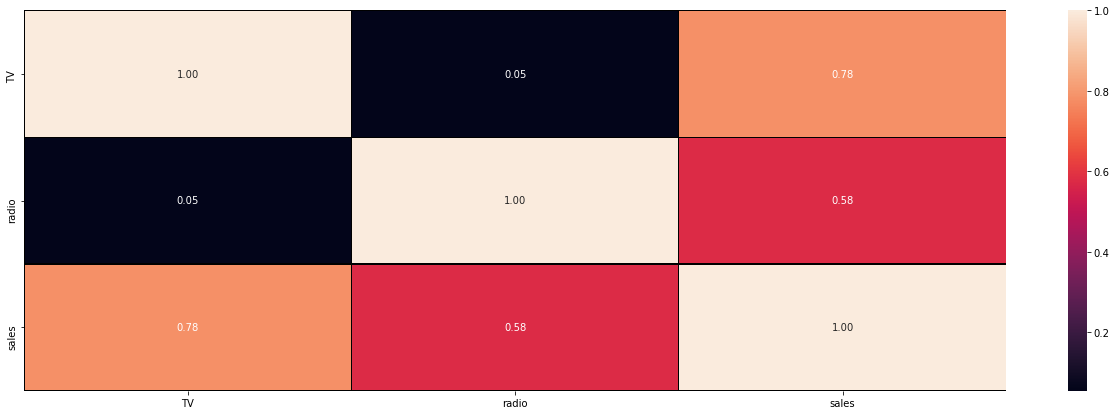

In [15]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [16]:
data.skew()

TV      -0.069853
radio    0.094175
sales    0.407571
dtype: float64

outlier check

In [17]:
df_features=data.drop('sales',axis=1)

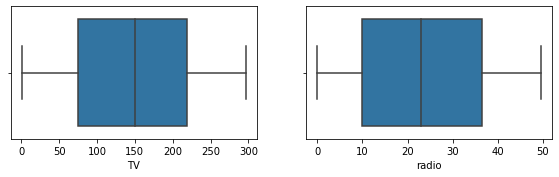

In [18]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<3:
        ax=plt.subplot(7,3,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

no outliers

In [19]:
#devide data set into feature and label
y=data['sales']
x=data.drop(['sales'],axis=1)

In [20]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [21]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

# model building

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=323)

In [25]:
y_train.head()

7      13.2
106     7.2
17     24.4
105    19.2
43     12.9
Name: sales, dtype: float64

In [26]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
#predict the sales of given feature
data.tail(2)

,TV,radio,sales
198,283.6,42.0,25.5
199,232.1,8.6,13.4


In [28]:
print(' Sales is:',regression.predict(scalar.transform([[283.6,42]])))

 Sales is: [23.8714934]


saving model

In [29]:
#saving model to the local file system
filename='finalized_model_advertising_sales.pickle'
pickle.dump(regression,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(scalar.transform([[232.1,8.6]]))
a

array([15.36675106])

In [30]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.9029529165718718

In [31]:
#check how well model fits the test data
regression.score(x_test,y_test)

0.8731413471176851

In [32]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([12.84931332, 21.79769571, 15.596443  , 12.25983291, 10.06086461,
       21.28682243, 16.49663427, 10.16420812, 10.29564246,  9.79948846,
       17.6010189 , 12.4911054 , 13.81798466, 15.51173973,  4.57265283,
       12.08980222, 12.89605199, 21.11298981, 12.85870627, 12.3513869 ,
       15.50091949, 12.76723797, 15.44044748, 14.32241141, 12.13103937,
       23.27352028, 19.00991969, 14.90157289,  6.65719268, 10.18184575,
        8.27777691, 14.52707654, 19.34994392, 14.12909065, 18.2289857 ,
       16.51577963,  3.6835541 , 10.52898541, 14.97291369, 15.3251802 ,
       17.87772181, 20.79490265, 18.44049775, 23.8714934 ,  7.84514371,
       19.07069353, 15.00063745, 16.92685949, 18.15983293, 11.43812594])

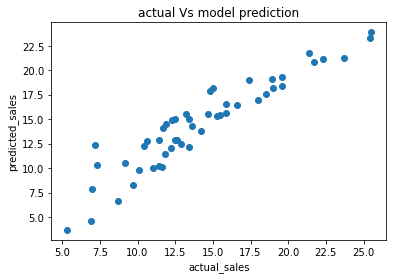

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_sales')
plt.ylabel('predicted_sales')
plt.title('actual Vs model prediction')
plt.show()

# cross validation of model
regularization


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
import warnings

In [39]:
from sklearn.linear_model import Lasso

In [40]:
warnings.filterwarnings('ignore')

In [42]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [44]:
from sklearn.metrics import r2_score

In [45]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.873090174640972

In [46]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8892832516729303

# Ensemble technique

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [56]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)                         

R2score: 97.65654739519303
cross val score: 97.79347894093156
